In [1]:
from CosinorPy import file_parser, cosinor, cosinor1, cosinor_nonlin
import numpy as np
import pandas as pd
import os

In [2]:
import importlib
importlib.reload(cosinor)
importlib.reload(cosinor1)
importlib.reload(cosinor_nonlin)
importlib.reload(file_parser)

<module 'CosinorPy.file_parser' from 'C:\\Users\\miham\\OneDrive - Univerza v Ljubljani\\Research\\CosinorPy\\code\\CosinorPy\\file_parser.py'>

## Generate test data

In [3]:
df = file_parser.generate_test_data(phase = np.pi, n_components = 1, name="sym", lin_comp = 0, noise=0.3, replicates = 3, noise_simple=0)
df2 = file_parser.generate_test_data(phase = 0, n_components = 1, name="sym_lin_comp", lin_comp = 0.1, noise=0.3, replicates = 3, noise_simple=0)
df = df.append(df2, ignore_index=True)

df2 = file_parser.generate_test_data(phase = np.pi, n_components = 3, name="asym", lin_comp = 0, noise=0.3, replicates = 3, noise_simple=0)
df = df.append(df2, ignore_index=True)
df2 = file_parser.generate_test_data(phase = 0, n_components = 3, name="asym_lin_comp", lin_comp = 0.1, noise=0.3, replicates = 3, noise_simple=0)
df = df.append(df2, ignore_index=True)


df2 = file_parser.generate_test_data(phase = 0, n_components = 1, name="sym_damped", amplification = -0.04, noise=0.3, replicates = 3, time_step=2,  max_time = 72, noise_simple=0)
df = df.append(df2, ignore_index=True)
df2 = file_parser.generate_test_data(phase = np.pi, n_components = 1, name="sym_forced", amplification = 0.04, noise=0.3, replicates = 3, time_step=2, max_time = 72, noise_simple=0)
df = df.append(df2, ignore_index=True)


df2 = file_parser.generate_test_data(phase = 0, n_components = 3, name="asym_damped", amplification = -0.04, noise=0.3, replicates = 3, time_step=2,  max_time = 72, noise_simple=0)
df = df.append(df2, ignore_index=True)
df2 = file_parser.generate_test_data(phase = np.pi, n_components = 3, name="asym_forced", amplification = 0.04, noise=0.3, replicates = 3, time_step=2, max_time = 72, noise_simple=0)
df = df.append(df2, ignore_index=True)

Let us plot the data first:

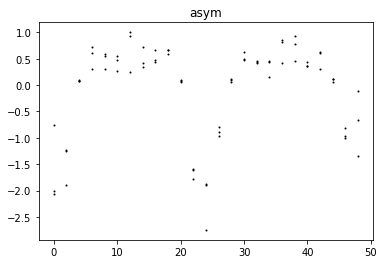

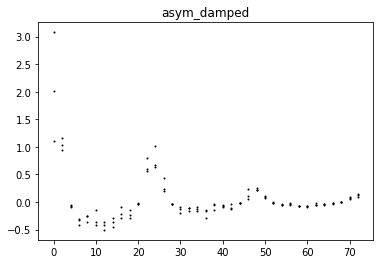

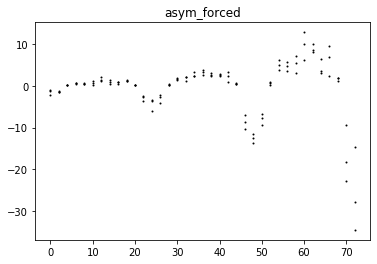

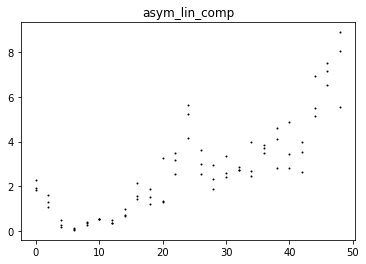

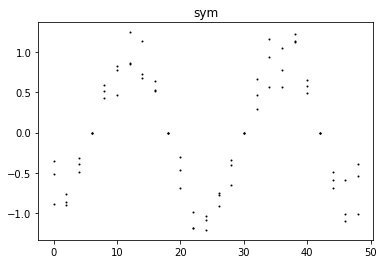

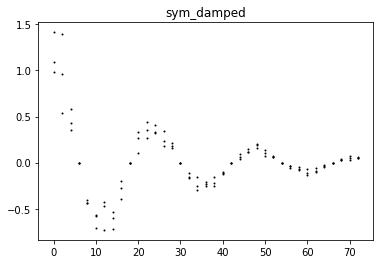

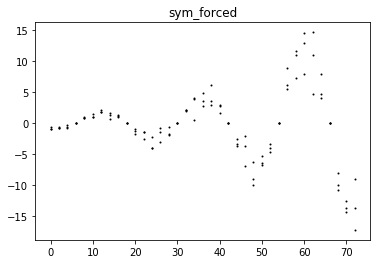

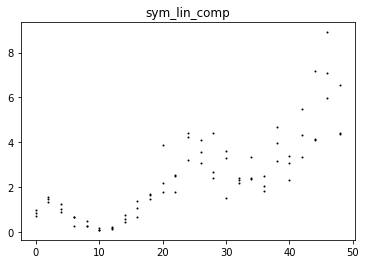

In [4]:
cosinor.plot_data(df)

In [5]:
#file_parser.export(df,"test_data\\independent_data_nonlin.xlsx")

In [6]:
df = file_parser.read_excel("test_data\\independent_data_nonlin.xlsx")

## Cosinor analysis

Identify the best models and/or the best periods (possible periods can be given as an interval or as a single value).

In [7]:
df_results = cosinor.fit_group(df, n_components = [1,2,3], period=24, plot=False, plot_phase=False, lin_comp=False)

Get the best models (the best fitting periods and the best fitting models - in dependence on the number of components; by default the criterium is p-value)

In [8]:
df_best_models = cosinor.get_best_models(df, df_results, n_components = [1,2,3])

In [9]:
df_best_models.to_csv(os.path.join("supp_tables2","supp_table_1.csv"), index=False)

... and plot these models

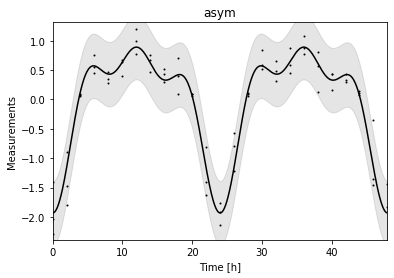

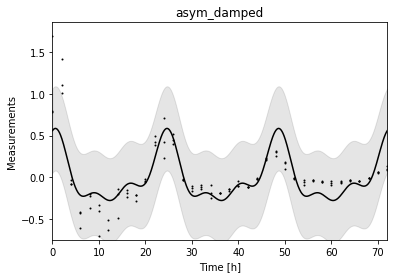

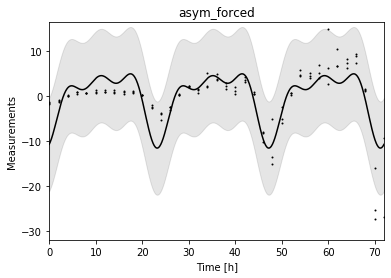

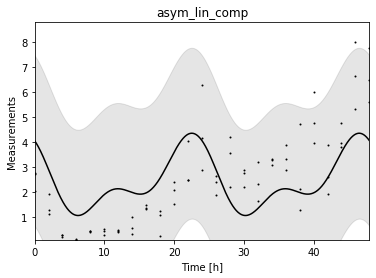

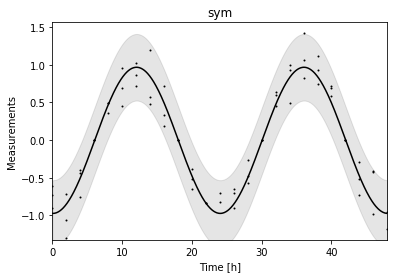

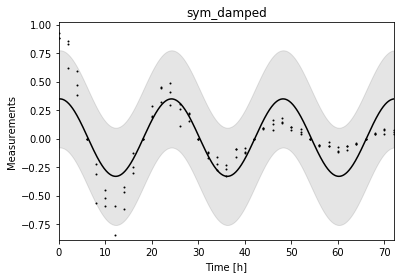

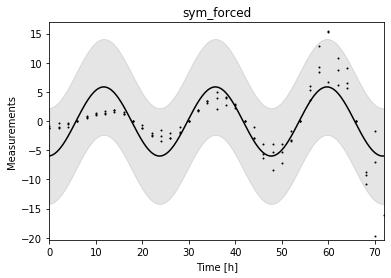

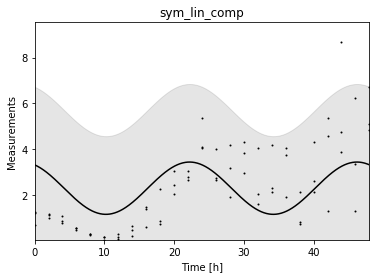

In [10]:
cosinor.plot_df_models(df, df_best_models, plot_phase=False)#, folder="nonlin_basic_models")

Obviously, some of these fits could be better by introducing linear component and/or amplification coefficient.

## Generalized cosinor1 analysis

First, we will use a single-component model. Using these functions, only 1-component models can be used, but the statistics can be obtained without boostrapping (so this is faster).

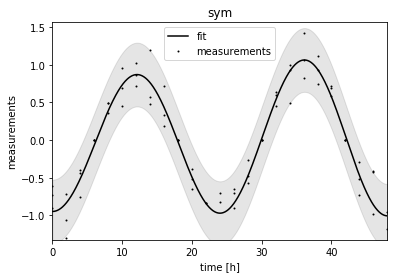

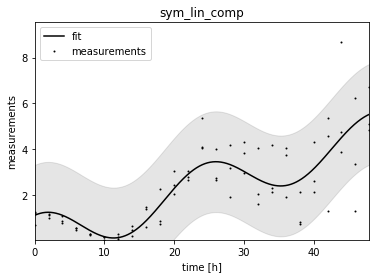

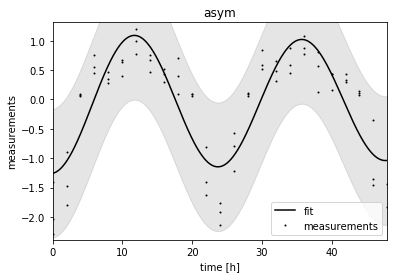

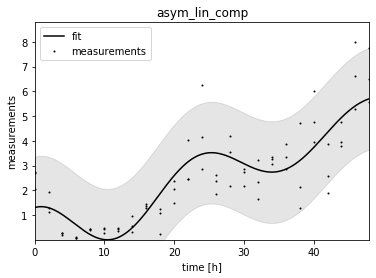

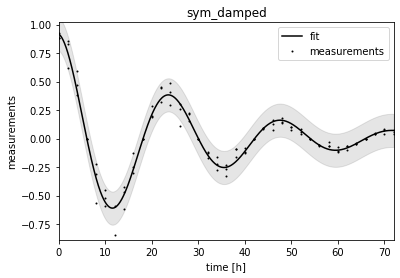

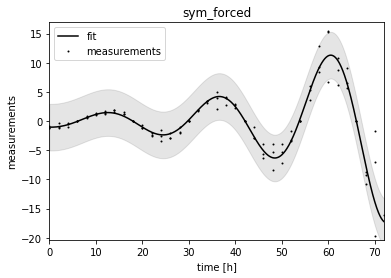

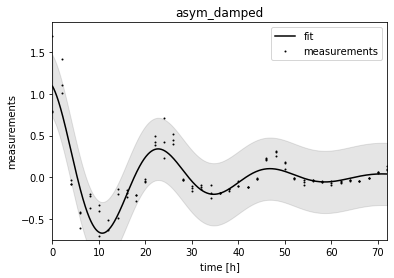

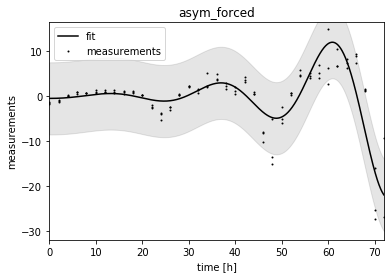

In [11]:
df_results = cosinor_nonlin.fit_generalized_cosinor_group(df, period = 24, plot=True)#, folder="nonlin_gen1_models") 

In [12]:
df_results.to_csv(os.path.join("supp_tables2","supp_table_2.csv"), index=False)

In [13]:
df_results[['test', 'amplitude', 'q(amplitude)', 'acrophase', 'q(acrophase)', 'amplification', 'q(amplification)', 'lin_comp', 'q(lin_comp)']].round(3)

,test,amplitude,q(amplitude),acrophase,q(acrophase),amplification,q(amplification),lin_comp,q(lin_comp)
0,sym,0.863,0.000,3.142,0.000,0.005,0.088,0.003,0.207
1,sym_lin_comp,1.071,0.004,-0.174,0.483,-0.001,0.910,0.093,0.000
2,asym,1.194,0.000,-3.079,0.000,-0.003,0.624,0.001,0.861
3,asym_lin_comp,1.306,0.001,0.016,0.932,-0.012,0.433,0.103,0.000
4,sym_damped,0.927,0.000,-0.017,0.599,-0.037,0.000,0.000,0.675
5,sym_forced,0.897,0.000,-3.118,0.000,0.041,0.000,0.009,0.675
6,asym_damped,1.127,0.000,0.148,0.044,-0.050,0.000,0.000,0.675
7,asym_forced,0.282,0.062,-3.142,0.000,0.061,0.000,0.015,0.675


## Comparison analysis using generalized cosinor1

The generalised 1-component cosinor model can also be used to compare pairs in a similar way as the basic 1-component model. First we need to define the pairs to compare:

In [14]:
pairs = [("sym", "sym_lin_comp"),("asym", "asym_lin_comp"), ("sym_damped", "sym_forced"), ("asym_damped", "asym_forced")]

Then, we can run the wrapper function that uses the same model:

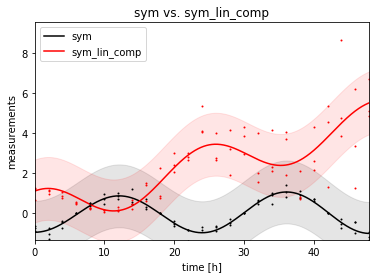

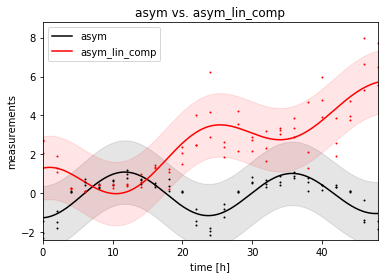

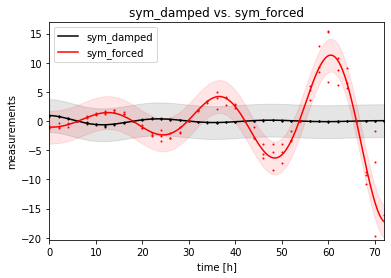

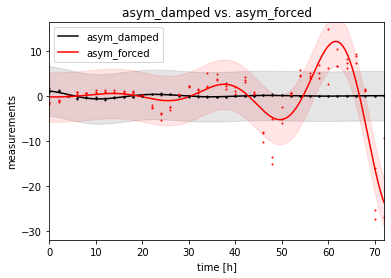

In [15]:
df_results_compare = cosinor_nonlin.fit_generalized_cosinor_compare_pairs_dependent(df, pairs, period=24, plot=True)

In [16]:
df_results_compare

,test,period,p,q,d_amplitude,p(d_amplitude),q(d_amplitude),CI(d_amplitude),d_acrophase,p(d_acrophase),q(d_acrophase),CI(d_acrophase),d_amplification,p(d_amplification),q(d_amplification),CI(d_amplification),d_lin_comp,p(d_lin_comp),q(d_lin_comp),CI(d_lin_comp)
0,sym vs. sym_lin_comp,24.0,1.110223e-16,1.110223e-16,0.208030,0.547232,0.886666,"[-0.4736075637564384, 0.8896679243894238]",2.967788,0.000000e+00,0.000000e+00,"[2.572531056630986, 3.3630446342592757]",-0.006150,0.626356,0.626356,"[-0.031067831765332368, 0.018768218286154107]",0.089944,3.108624e-15,6.217249e-15,"[0.06989502281837515, 0.10999263474159043]"
1,asym vs. asym_lin_comp,24.0,1.110223e-16,1.110223e-16,0.130730,0.741699,0.886666,"[-0.6518724128778004, 0.9133332416852835]",3.088088,0.000000e+00,0.000000e+00,"[2.6974205188163864, 3.478754679039855]",-0.008885,0.482425,0.626356,"[-0.0338265504855139, 0.016056679514841438]",0.103402,0.000000e+00,0.000000e+00,"[0.08256596786578607, 0.12423871706244133]"
2,sym_damped vs. sym_forced,24.0,1.110223e-16,1.110223e-16,-0.083906,0.886666,0.886666,"[-1.2429926727866722, 1.0751813155882406]",-3.102978,3.858488e-09,5.144651e-09,"[-4.0979918731269205, -2.1079649274343657]",0.080141,0.026855,0.107418,"[0.009272383857245117, 0.1510086281193737]",0.008663,3.714126e-01,4.952168e-01,"[-0.010400941724201009, 0.027726016439931306]"
3,asym_damped vs. asym_forced,24.0,1.110223e-16,1.110223e-16,-0.910967,0.470417,0.886666,"[-3.3943293909574863, 1.5723954550263568]",2.813266,4.698338e-03,4.698338e-03,"[0.8724238693311626, 4.754108501507119]",0.115691,0.181634,0.363268,"[-0.05447928867456822, 0.2858618179173289]",0.002617,8.920629e-01,8.920629e-01,"[-0.035353210160672756, 0.040587056730173134]"


... or two independent models, which means that each model can be fitted with a different period:

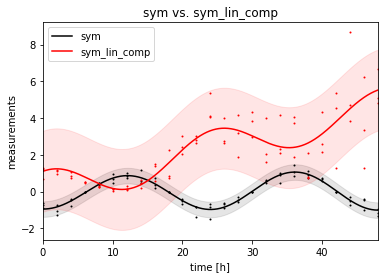

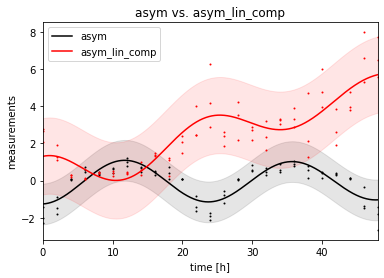

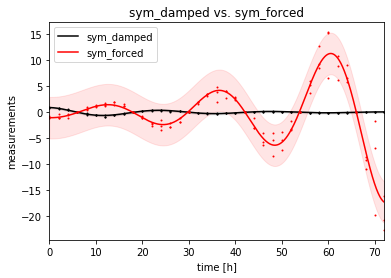

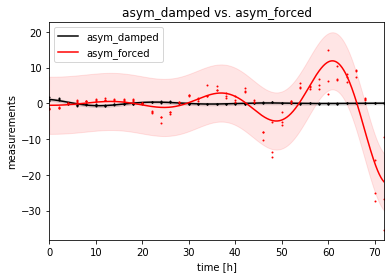

In [17]:
df_results_compare = cosinor_nonlin.fit_generalized_cosinor_compare_pairs_independent(df, pairs, period1=24, period2=24, plot=True)

In [18]:
df_results_compare

,test,period1,period2,d_amplitude,p(d_amplitude),q(d_amplitude),CI(d_amplitude),d_acrophase,p(d_acrophase),q(d_acrophase),CI(d_acrophase),d_amplification,p(d_amplification),q(d_amplification),CI(d_amplification),d_lin_comp,p(d_lin_comp),q(d_lin_comp),CI(d_lin_comp)
0,sym vs. sym_lin_comp,24.0,24.0,0.207991,0.558929,0.862570,"[-0.4939932406425893, 0.9099762043195314]",2.967803,0.0,0.0,"[2.58518928448936, 3.3504166232185515]",-0.006148,0.615523,0.615523,"[-0.030300570699506195, 0.018004029608832024]",0.089943,3.108624e-15,6.217249e-15,"[0.06990846767277002, 0.10997787657854831]"
1,asym vs. asym_lin_comp,24.0,24.0,0.112556,0.780358,0.862570,"[-0.6840023738988944, 0.9091135556433952]",3.094744,0.0,0.0,"[2.694554664902137, 3.494933578101721]",-0.008220,0.527604,0.615523,"[-0.03388582225400279, 0.01744581861912345]",0.102287,0.000000e+00,0.000000e+00,"[0.0814398348090664, 0.12313389920976887]"
2,sym_damped vs. sym_forced,24.0,24.0,-0.030295,0.862570,0.862570,"[-0.37487167549031575, 0.3142821736725786]",-3.100567,0.0,0.0,"[-3.1967597276170014, -3.0043736295915764]",0.077985,0.000000,0.000000,"[0.07097345099800974, 0.08499619732862972]",0.008803,3.646725e-01,4.697498e-01,"[-0.010298808821265357, 0.02790444553029459]"
3,asym_damped vs. asym_forced,24.0,24.0,-0.844588,0.000002,0.000007,"[-1.1837566657460332, -0.5054198629926696]",2.993887,0.0,0.0,"[2.7868077915521887, 3.2009667642228745]",0.111129,0.000000,0.000000,"[0.09159687308037692, 0.13066015631917233]",0.014471,4.697498e-01,4.697498e-01,"[-0.024921038489691412, 0.053864037121703824]"


## Generalized multicomponent cosinor analysis
A better fit would be obtained in some cases (e.g., test7 and test8) if a multicomponent cosinor model would be used. 

We can use a wrapper function that automatically identifies the optimal number of components for each dataset, and plots and stores the results in a data frame.

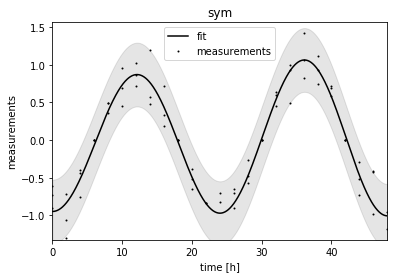

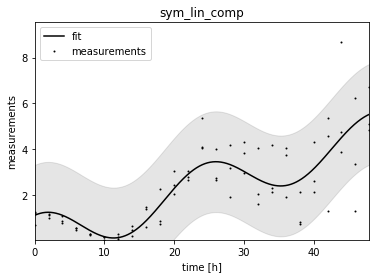

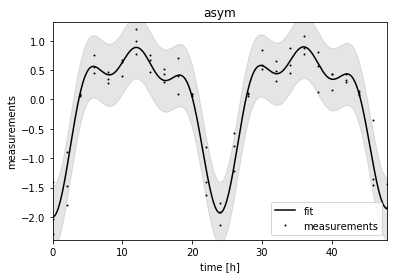

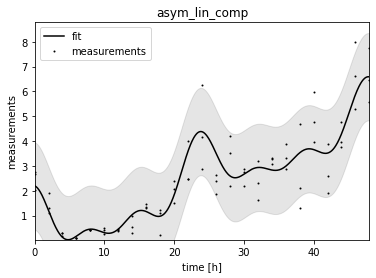

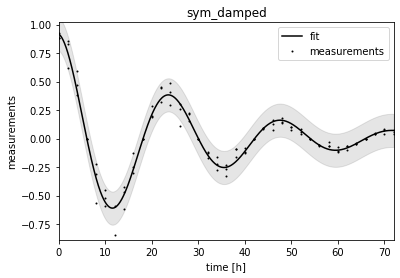

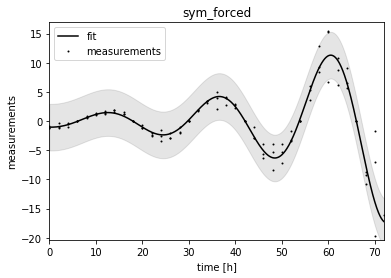

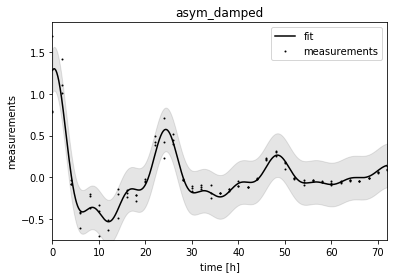

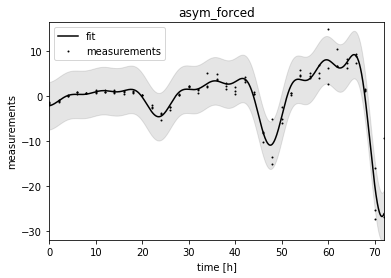

In [19]:
df_best_models = cosinor_nonlin.fit_generalized_cosinor_n_comp_group_best(df, period=24, n_components = [1,2,3], plot=True)#, folder="nonlin_gen_models") 

In [20]:
df_best_models.to_csv(os.path.join("supp_tables2","supp_table_3.csv"), index=False)
df_best_models[['test', 'n_components']]

,test,n_components
0,sym,1.0
1,sym_lin_comp,1.0
2,asym,3.0
3,asym_lin_comp,3.0
4,sym_damped,1.0
5,sym_forced,1.0
6,asym_damped,3.0
7,asym_forced,3.0


In [21]:
df_best_models

,test,period,n_components,p,q,RSS,amplitude,acrophase,mesor,peaks,...,troughs,heights2,amplification,p(amplification),q(amplification),CI(amplification),lin_comp,p(lin_comp),q(lin_comp),CI(lin_comp)
0,sym,24.0,1.0,1.110223e-16,1.268826e-16,3.154412,0.862770,3.138448,-0.085299,[12.012012012012011],...,[],[],0.004788,0.055302,0.088484,"[-0.00011160240822076506, 0.00968819248321229]",0.003433,7.758087e-02,1.551617e-01,"[-0.0003895082816313838, 0.007255991432152397]"
1,sym_lin_comp,24.0,1.0,6.661338e-16,6.661338e-16,85.252168,1.070762,-0.176105,0.050780,[0.6726726726726726],...,[12.684684684684685],[-1.0199662702640757],-0.001360,0.909855,0.909855,"[-0.025230046049080943, 0.022510095033398295]",0.093376,5.262457e-14,2.104983e-13,"[0.0735277245414441, 0.11322510286039525]"
2,asym,24.0,3.0,1.110223e-16,1.268826e-16,4.658388,1.442194,3.138448,-0.559778,"[5.861861861861862, 12.012012012012011, 18.162...",...,[23.975975975975977],[-2.001850238033429],-0.000902,0.672236,0.768270,"[-0.005140668519573382, 0.003336308993068069]",0.001193,6.313676e-01,6.313676e-01,"[-0.003748388480736323, 0.006134491578702058]"
3,asym_lin_comp,24.0,3.0,1.110223e-16,1.268826e-16,51.212062,1.587876,0.094342,0.647528,[23.63963963963964],...,"[5.237237237237237, 11.243243243243244, 18.114...","[-0.4927654514825059, -0.8695369096439735, -0....",-0.005274,0.456622,0.608829,"[-0.019334909508832765, 0.00878741138995]",0.101660,0.000000e+00,0.000000e+00,"[0.08524571781276978, 0.11807383059664552]"
4,sym_damped,24.0,1.0,1.110223e-16,1.268826e-16,0.571337,0.927070,-0.012579,-0.010009,[0.04804804804804805],...,[12.06006006006006],[-0.9370789826313877],-0.036508,0.000000,0.000000,"[-0.04012389572463813, -0.03289297478955026]",0.000200,5.696274e-01,6.313676e-01,"[-0.000494738233709746, 0.0008943770516063663]"
5,sym_forced,24.0,1.0,1.110223e-16,1.268826e-16,430.730041,0.896775,-3.119579,-0.141673,[11.915915915915916],...,[23.92792792792793],[-1.0384371004315247],0.041476,0.000000,0.000000,"[0.035421428075016914, 0.047531349737434156]",0.009003,3.546929e-01,4.729239e-01,"[-0.010197770800841614, 0.028203046327767465]"
6,asym_damped,24.0,3.0,1.110223e-16,1.268826e-16,1.767559,1.053529,-0.138368,0.264037,[0.5285285285285285],...,"[6.678678678678678, 12.3003003003003, 18.69069...","[-0.5093380994992068, -0.7894795391947516, -0....",-0.033709,0.000000,0.000000,"[-0.039332310470096304, -0.028084813852797944]",0.001204,6.109422e-02,1.551617e-01,"[-5.708676715342328e-05, 0.002465777875954703]"
7,asym_forced,24.0,3.0,1.110223e-16,1.268826e-16,721.307107,1.407823,-2.981211,-0.865149,"[5.381381381381381, 11.387387387387387, 17.393...",...,[23.3993993993994],[-2.2729715642523467],0.036752,0.000000,0.000000,"[0.030488670032487574, 0.04301616515508209]",0.016705,1.987559e-01,3.180094e-01,"[-0.008910551438009076, 0.04231974232870428]"


Alternatively, we can also fix the number of components to the same value for all datasets:

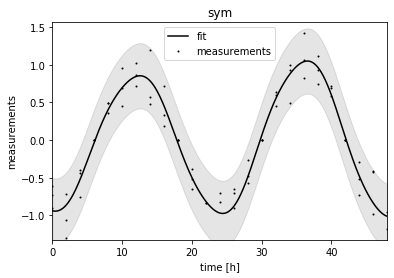

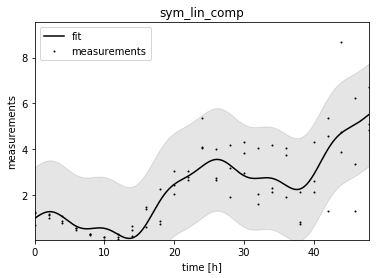

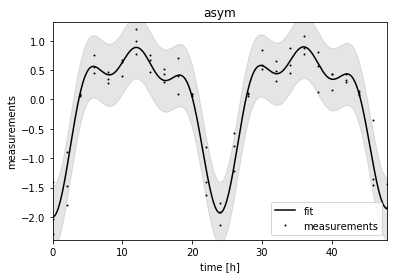

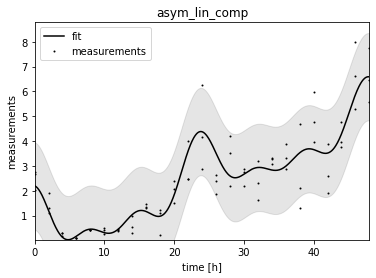

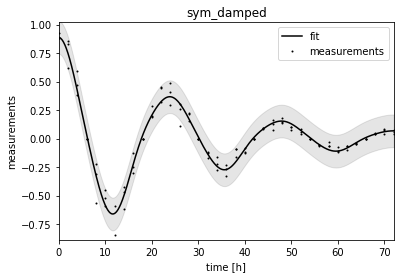

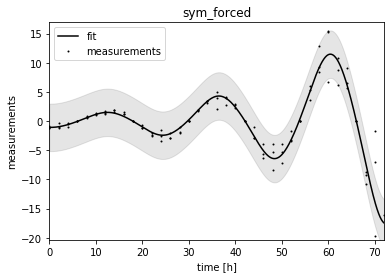

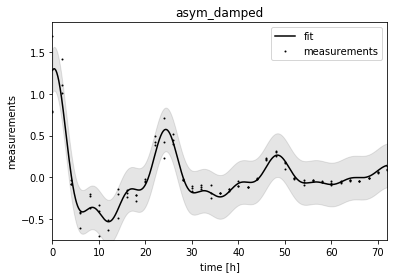

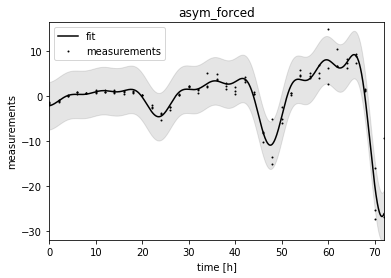

In [22]:
df_3comp_models = cosinor_nonlin.fit_generalized_cosinor_n_comp_group(df, period=24, n_components = 3, plot=True)

In [23]:
df_3comp_models

,test,period,n_components,p,q,RSS,amplitude,acrophase,mesor,peaks,...,troughs,heights2,amplification,p(amplification),q(amplification),CI(amplification),lin_comp,p(lin_comp),q(lin_comp),CI(lin_comp)
0,sym,24.0,3.0,1.110223e-16,1.268826e-16,3.109299,0.850474,3.025237,-0.092968,[12.444444444444445],...,[0.3843843843843844],[-0.9434427756167493],0.005048,0.059279,0.094847,"[-0.0002033849205052094, 0.010299351549417097]",0.003353,9.385759e-02,1.877152e-01,"[-0.0005851806610346201, 0.00729150326806606]"
1,sym_lin_comp,24.0,3.0,2.564615e-13,2.564615e-13,83.178613,1.109335,-0.402526,-0.020284,[1.5375375375375375],...,[13.981981981981981],[-1.1295867840032199],0.002645,0.835436,0.835436,"[-0.022672036985097337, 0.02796106853051316]",0.092376,2.744471e-13,1.097789e-12,"[0.07213635477111897, 0.11261567249635311]"
2,asym,24.0,3.0,1.110223e-16,1.268826e-16,4.658388,1.442194,3.138448,-0.559778,"[5.861861861861862, 12.012012012012011, 18.162...",...,[23.975975975975977],[-2.001850238033429],-0.000902,0.672236,0.768270,"[-0.005140668519573382, 0.003336308993068069]",0.001193,6.313676e-01,6.313676e-01,"[-0.003748388480736323, 0.006134491578702058]"
3,asym_lin_comp,24.0,3.0,1.110223e-16,1.268826e-16,51.212062,1.587876,0.094342,0.647528,[23.63963963963964],...,"[5.237237237237237, 11.243243243243244, 18.114...","[-0.4927654514825059, -0.8695369096439735, -0....",-0.005274,0.456622,0.608829,"[-0.019334909508832765, 0.00878741138995]",0.101660,0.000000e+00,0.000000e+00,"[0.08524571781276978, 0.11807383059664552]"
4,sym_damped,24.0,3.0,1.110223e-16,1.268826e-16,0.534807,0.955945,-0.088053,-0.062931,[0.3363363363363363],...,[12.012012012012011],[-1.01885342658976],-0.036740,0.000000,0.000000,"[-0.04066301060268473, -0.032816434183546746]",0.000183,5.996946e-01,6.313676e-01,"[-0.0005075778938814918, 0.0008744000937996122]"
5,sym_forced,24.0,3.0,1.110223e-16,1.268826e-16,429.630618,0.923730,-3.119579,-0.148790,[11.915915915915916],...,[23.92792792792793],[-1.0725112467001126],0.041249,0.000000,0.000000,"[0.034792275478892826, 0.04770495023373267]",0.009335,3.483715e-01,4.644953e-01,"[-0.01031875983959316, 0.028988226583688114]"
6,asym_damped,24.0,3.0,1.110223e-16,1.268826e-16,1.767559,1.053529,-0.138368,0.264037,[0.5285285285285285],...,"[6.678678678678678, 12.3003003003003, 18.69069...","[-0.5093380994992068, -0.7894795391947516, -0....",-0.033709,0.000000,0.000000,"[-0.039332310470096304, -0.028084813852797944]",0.001204,6.109422e-02,1.629179e-01,"[-5.708676715342328e-05, 0.002465777875954703]"
7,asym_forced,24.0,3.0,1.110223e-16,1.268826e-16,721.307107,1.407823,-2.981211,-0.865149,"[5.381381381381381, 11.387387387387387, 17.393...",...,[23.3993993993994],[-2.2729715642523467],0.036752,0.000000,0.000000,"[0.030488670032487574, 0.04301616515508209]",0.016705,1.987559e-01,3.180094e-01,"[-0.008910551438009076, 0.04231974232870428]"


However, the significance of amplitudes and acrophases being different than zero now needs to be evaluated using bootstrap.

We can do this using the best models for each dataset:

In [24]:
df_bootstrap = cosinor_nonlin.bootstrap_generalized_cosinor_n_comp_group_best(df, df_best_models, bootstrap_size=100)

In [25]:
df_bootstrap.to_csv(os.path.join("supp_tables2","supp_table_4.csv"), index=False)
df_bootstrap[['test', 'amplitude', 'q(amplitude)', 'acrophase', 'q(acrophase)', 'amplification', 'q(amplification)', 'lin_comp', 'q(lin_comp)']].round(3)

,test,amplitude,q(amplitude),acrophase,q(acrophase),amplification,q(amplification),lin_comp,q(lin_comp)
0,sym,0.863,0.000,3.138,0.000,0.005,0.088,0.003,0.155
1,sym_lin_comp,1.071,0.000,-0.176,0.507,-0.001,0.910,0.093,0.000
2,asym,1.442,0.000,3.138,0.000,-0.001,0.768,0.001,0.631
3,asym_lin_comp,1.588,0.000,0.094,0.530,-0.005,0.609,0.102,0.000
4,sym_damped,0.927,0.000,-0.013,0.530,-0.037,0.000,0.000,0.631
5,sym_forced,0.897,0.000,-3.120,0.000,0.041,0.000,0.009,0.473
6,asym_damped,1.054,0.000,-0.138,0.078,-0.034,0.000,0.001,0.155
7,asym_forced,1.408,0.001,-2.981,0.000,0.037,0.000,0.017,0.318


Alternatively, we can also fix the number of components to the same value for all the datasets:

In [26]:
df_bootstrap3 = cosinor_nonlin.bootstrap_generalized_cosinor_n_comp_group(df, period=24, n_components=3, bootstrap_size=100)

Divergence error at  with 3 components!


In [27]:
df_bootstrap3

,test,period,n_components,p,q,amplitude,p(amplitude),q(amplitude),CI(amplitude),acrophase,...,q(acrophase),CI(acrophase),amplification,p(amplification),q(amplification),CI(amplification),lin_comp,p(lin_comp),q(lin_comp),CI(lin_comp)
0,sym,24.0,3.0,1.110223e-16,1.268826e-16,0.850474,0.000000e+00,0.000000e+00,"[0.6985791079573709, 1.0146936603320564]",3.025237,...,0.000000,"[2.759165232520561, 3.330341282786971]",0.005048,0.059279,0.094847,"[-0.0002033849205052094, 0.010299351549417097]",0.003353,9.385759e-02,1.877152e-01,"[-0.0005851806610346201, 0.00729150326806606]"
1,sym_lin_comp,24.0,3.0,2.564615e-13,2.564615e-13,1.109335,3.454122e-02,3.454122e-02,"[0.06672814276671368, 1.7283675780155034]",-0.402526,...,0.791041,"[-1.424120048698778, 1.088040746988722]",0.002645,0.835436,0.835436,"[-0.022672036985097337, 0.02796106853051316]",0.092376,2.744471e-13,1.097789e-12,"[0.07213635477111897, 0.11261567249635311]"
2,asym,24.0,3.0,1.110223e-16,1.268826e-16,1.442194,0.000000e+00,0.000000e+00,"[1.2021593826697974, 1.6933622109434159]",3.138448,...,0.000000,"[-3.4338272695356995, -2.8384586220227552]",-0.000902,0.672236,0.768270,"[-0.005140668519573382, 0.003336308993068069]",0.001193,6.313676e-01,6.313676e-01,"[-0.003748388480736323, 0.006134491578702058]"
3,asym_lin_comp,24.0,3.0,1.110223e-16,1.268826e-16,1.587876,2.662699e-05,3.043085e-05,"[0.8476041158787727, 2.2268880846746533]",0.094342,...,0.436852,"[-0.1220465717944742, 0.3153792764352411]",-0.005274,0.456622,0.608829,"[-0.019334909508832765, 0.00878741138995]",0.101660,0.000000e+00,0.000000e+00,"[0.08524571781276978, 0.11807383059664552]"
4,sym_damped,24.0,3.0,1.110223e-16,1.268826e-16,0.955945,0.000000e+00,0.000000e+00,"[0.8254009801785933, 1.0591447669619733]",-0.088053,...,0.415792,"[-0.33802366739398626, 0.10909949438148667]",-0.036740,0.000000,0.000000,"[-0.04066301060268473, -0.032816434183546746]",0.000183,5.996946e-01,6.313676e-01,"[-0.0005075778938814918, 0.0008744000937996122]"
5,sym_forced,24.0,3.0,1.110223e-16,1.268826e-16,0.923730,8.678733e-06,1.388597e-05,"[0.5006169408139792, 1.2295250806275635]",-3.119579,...,0.000000,"[-3.4794090991534485, -2.6930171427736367]",0.041249,0.000000,0.000000,"[0.034792275478892826, 0.04770495023373267]",0.009335,3.483715e-01,4.644953e-01,"[-0.01031875983959316, 0.028988226583688114]"
6,asym_damped,24.0,3.0,1.110223e-16,1.268826e-16,1.053529,6.339682e-09,1.267936e-08,"[0.7442463733036903, 1.4126356569903353]",-0.138368,...,0.105275,"[-0.2685108427796581, 0.008661264909903377]",-0.033709,0.000000,0.000000,"[-0.039332310470096304, -0.028084813852797944]",0.001204,6.109422e-02,1.629179e-01,"[-5.708676715342328e-05, 0.002465777875954703]"
7,asym_forced,24.0,3.0,1.110223e-16,1.268826e-16,1.407823,1.974212e-05,2.632283e-05,"[0.7675843376735108, 1.9788515889203082]",-2.981211,...,0.000157,"[1.5065036855164509, 4.2898639710247375]",0.036752,0.000000,0.000000,"[0.030488670032487574, 0.04301616515508209]",0.016705,1.987559e-01,3.180094e-01,"[-0.008910551438009076, 0.04231974232870428]"


## Comparison using generalized multicomponent cosinor analysis
This analysis relies on the bootsrapping as in the basic multicomponent cosinor analysis. However, it is not necessary to run bootstrap again, since we can use the results produced in previous steps. Namely, we will use the confidence intervals of the basic bootstrap analyses.

First, we need to define the pairs to compare:

In [28]:
pairs = [("sym", "sym_lin_comp"),("asym", "asym_lin_comp"), ("sym_damped", "sym_forced"), ("asym_damped", "asym_forced")]

Then, we can run the analysis. To reduce the computing time, we can specify the bootstrap results obtained earlier (`df_bootstrap_single` parameter).

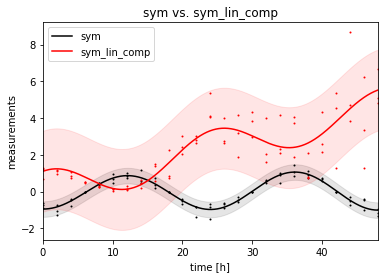

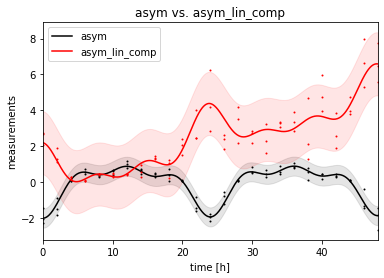

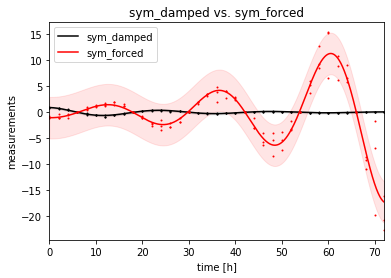

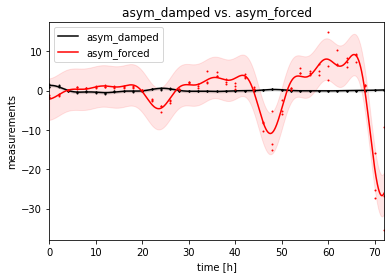

In [29]:
df_bootstrap_compare = cosinor_nonlin.compare_pairs_n_comp_bootstrap_group(df, pairs, df_best_models=df_best_models, df_bootstrap_single=df_bootstrap, plot=True)#, folder="nonlin_gen_compare")

In [30]:
df_bootstrap.to_csv(os.path.join("supp_tables2","supp_table_5.csv"), index=False)
df_bootstrap_compare[['test', 'n_components1', 'n_components2', 'd_amplitude', 'q(d_amplitude)', 'd_acrophase', 'q(d_acrophase)', 'd_amplification', 'q(d_amplification)', 'd_lin_comp', 'q(d_lin_comp)']].round(3)

,test,n_components1,n_components2,d_amplitude,q(d_amplitude),d_acrophase,q(d_acrophase),d_amplification,q(d_amplification),d_lin_comp,q(d_lin_comp)
0,sym vs. sym_lin_comp,1.0,1.0,0.208,0.777,2.969,0.0,-0.006,0.616,0.090,0.000
1,asym vs. asym_lin_comp,3.0,3.0,0.146,0.873,-3.044,0.0,-0.004,0.616,0.100,0.000
2,sym_damped vs. sym_forced,1.0,1.0,-0.030,0.873,-3.107,0.0,0.078,0.000,0.009,0.365
3,asym_damped vs. asym_forced,3.0,3.0,0.354,0.777,-2.843,0.0,0.070,0.000,0.016,0.309


If this argument is not specified (or if a certain measurement is missing), bootstrap is ran (again) on individual fits.

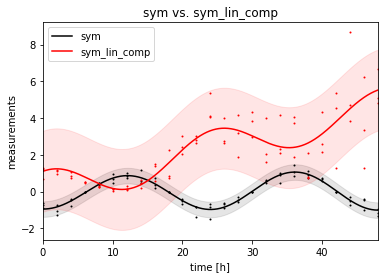

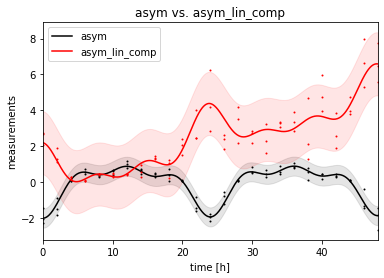

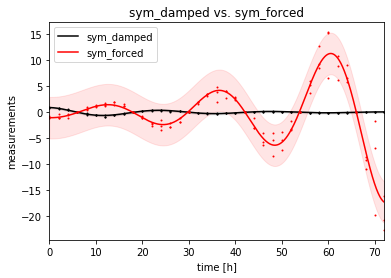

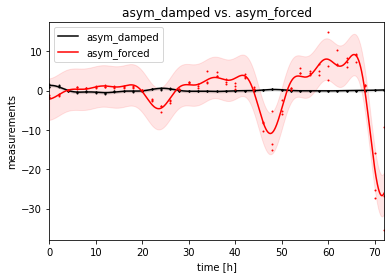

In [31]:
df_bootstrap_compare2 = cosinor_nonlin.compare_pairs_n_comp_bootstrap_group(df, pairs, df_best_models=df_best_models, bootstrap_size=100, plot=True)

In [32]:
df_bootstrap_compare2

,test,period1,period2,n_components1,n_components2,d_amplitude,p(d_amplitude),q(d_amplitude),CI(d_amplitude),d_acrophase,...,q(d_acrophase),CI(d_acrophase),d_amplification,p(d_amplification),q(d_amplification),CI(d_amplification),d_lin_comp,p(d_lin_comp),q(d_lin_comp),CI(d_lin_comp)
0,sym vs. sym_lin_comp,24.0,24.0,1.0,1.0,0.207992,0.239693,0.818869,"[-0.13985611363927342, 0.5558401046832028]",2.968632,...,0.00000,"[2.6273913847565082, 3.3098728094151926]",-0.006148,0.615523,0.615523,"[-0.030300570699506195, 0.018004029608832024]",0.089943,3.108624e-15,6.217249e-15,"[0.06990846767277002, 0.10997787657854831]"
1,asym vs. asym_lin_comp,24.0,24.0,3.0,3.0,0.145682,0.671052,0.868929,"[-0.5300273168126907, 0.8213906812016009]",-3.044106,...,0.00000,"[-3.3977182255377842, -2.6904933634009947]",-0.004372,0.553222,0.615523,"[-0.018919717323402002, 0.010176578731024554]",0.100467,0.000000e+00,0.000000e+00,"[0.08348598617694836, 0.11744745913450119]"
2,sym_damped vs. sym_forced,24.0,24.0,1.0,1.0,-0.030295,0.868929,0.868929,"[-0.3919294708376542, 0.33133994636953684]",-3.107001,...,0.00000,"[-3.1976058944483547, -3.0163951901296544]",0.077985,0.000000,0.000000,"[0.07097345099800974, 0.08499619732862972]",0.008803,3.646725e-01,3.646725e-01,"[-0.010298808821265357, 0.02790444553029459]"
3,asym_damped vs. asym_forced,24.0,24.0,3.0,3.0,0.354294,0.409434,0.818869,"[-0.4911994473782817, 1.1997877031499222]",-2.842843,...,0.00028,"[-4.356505850889997, -1.329179352003242]",0.070461,0.000000,0.000000,"[0.06201807969932896, 0.07890387981113495]",0.015500,2.319546e-01,3.092727e-01,"[-0.009991398684926343, 0.04099189846682027]"


Above, the parameters of the best models were identified using the `df_best_models` argument. If this is not specified `n_components` is used for all the fits.

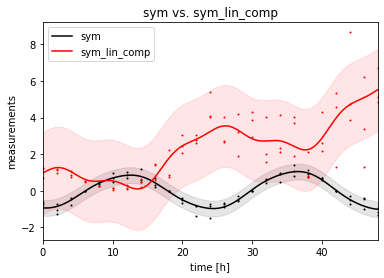

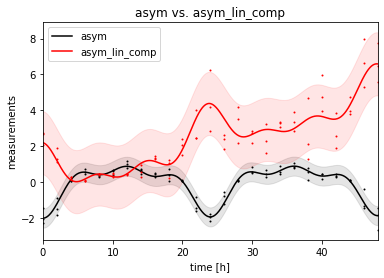

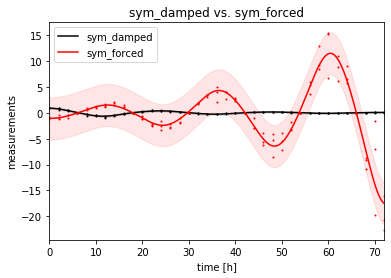

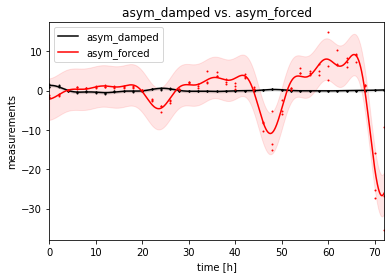

In [33]:
df_bootstrap_compare3 = cosinor_nonlin.compare_pairs_n_comp_bootstrap_group(df, pairs, n_components=3, period=24, bootstrap_size=100, plot=True)

In [34]:
df_bootstrap_compare3

,test,period1,period2,n_components1,n_components2,d_amplitude,p(d_amplitude),q(d_amplitude),CI(d_amplitude),d_acrophase,...,q(d_acrophase),CI(d_acrophase),d_amplification,p(d_amplification),q(d_amplification),CI(d_amplification),d_lin_comp,p(d_lin_comp),q(d_lin_comp),CI(d_lin_comp)
0,sym vs. sym_lin_comp,24.0,24.0,3.0,3.0,0.258861,0.599915,0.851538,"[-0.7131843664357568, 1.2309063291579019]",2.855422,...,0.000002,"[1.729854258207939, 3.9809888438131473]",-0.002403,0.853009,0.853009,"[-0.028016086187383847, 0.023209151103887778]",0.089023,1.953993e-14,3.907985e-14,"[0.06859724167725996, 0.10944846298318069]"
1,asym vs. asym_lin_comp,24.0,24.0,3.0,3.0,0.145682,0.687866,0.851538,"[-0.5686488926977522, 0.8600122570866624]",-3.044106,...,0.000000,"[-3.3976995028113057, -2.690512086127473]",-0.004372,0.553222,0.737630,"[-0.018919717323402002, 0.010176578731024554]",0.100467,0.000000e+00,0.000000e+00,"[0.08348598617694836, 0.11744745913450119]"
2,sym_damped vs. sym_forced,24.0,24.0,3.0,3.0,-0.032215,0.851538,0.851538,"[-0.3713564514243011, 0.30692669251585253]",-3.031527,...,0.000000,"[-3.443021293307207, -2.620032396503724]",0.077988,0.000000,0.000000,"[0.07047896182291646, 0.0854977086759405]",0.009151,3.570455e-01,3.570455e-01,"[-0.010395812577683166, 0.02869845712186]"
3,asym_damped vs. asym_forced,24.0,24.0,3.0,3.0,0.354294,0.342196,0.851538,"[-0.3797547654716684, 1.088343021243309]",-2.842843,...,0.000336,"[-4.377550961514434, -1.3081342413788046]",0.070461,0.000000,0.000000,"[0.06201807969932896, 0.07890387981113495]",0.015500,2.319546e-01,3.092727e-01,"[-0.009991398684926343, 0.04099189846682027]"
